In [44]:
include("../pic3d.jl")
using .PIC3D
using PyPlot
using LinearAlgebra
using PyCall
anim =  pyimport("matplotlib.animation");
using BenchmarkTools
using Random

In [45]:
Random.seed!(1234)
num = 2e6
electrons = PIC3D.Species(q=PIC3D.q_e*num, m=PIC3D.m_e*num)
ions = PIC3D.Species(q=-PIC3D.q_e*num, m=PIC3D.m_e*num)
for i = 1:200
    push!(electrons.x, [rand()*PIC3D.XL, rand()*PIC3D.YL, rand()*PIC3D.ZL])
    push!(electrons.v, [5e6, -1e6, 4e6])
    push!(ions.x, [rand()*PIC3D.XL, rand()*PIC3D.YL, rand()*PIC3D.ZL])
    push!(ions.v, [-5e6, 1e6, -4e6])
end

In [46]:
historyxxe = []
historyvele = []
historyxxi = []
historyveli = []
for i = 1:500
    PIC3D.timestep!(electrons, ions, 1.0)
    push!(historyxxe, [[ex...] for ex in electrons.x])
    push!(historyvele, [[ev...] for ev in electrons.v])
    push!(historyxxi, [[ix...] for ix in ions.x])
    push!(historyveli, [[iv...] for iv in ions.v])
end

GS failed to converge, L2 = 0.4337199683515462
GS failed to converge, L2 = 0.4018200412144673
GS failed to converge, L2 = 0.4632050202255976
GS failed to converge, L2 = 0.5317500063055839
GS failed to converge, L2 = 0.5622452342729582
GS failed to converge, L2 = 0.6295691632167228
GS failed to converge, L2 = 0.6256570628414209
GS failed to converge, L2 = 0.6992898230343247
GS failed to converge, L2 = 0.73332954845304
GS failed to converge, L2 = 0.6177160427924635
GS failed to converge, L2 = 0.599634359537857
GS failed to converge, L2 = 0.41218942318013196
GS failed to converge, L2 = 0.3747257576331104
GS failed to converge, L2 = 0.34059439695301047
GS failed to converge, L2 = 0.39179630300727997
GS failed to converge, L2 = 0.3686633867281007
GS failed to converge, L2 = 0.3504080806319935
GS failed to converge, L2 = 0.3969969569361034
GS failed to converge, L2 = 0.412966537583607
GS failed to converge, L2 = 0.38921289483082894
GS failed to converge, L2 = 0.4450145561874973
GS failed to 

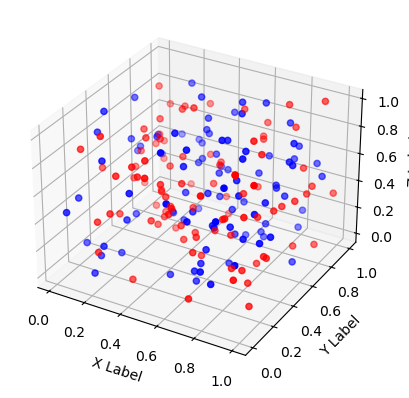

In [29]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")


ax.scatter([x[1] for x in historyxxe[1]], [x[2] for x in historyxxe[1]], [x[3] for x in historyxxe[1]], marker="o", color="blue")
ax.scatter([x[1] for x in historyxxi[1]], [x[2] for x in historyxxi[1]], [x[3] for x in historyxxi[1]], marker="o", color="red")

ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")

plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


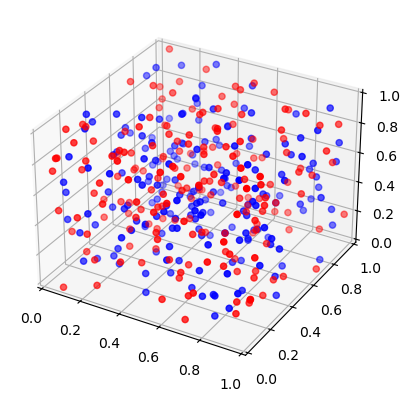

In [47]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.set_zlim((0,1))
function make_frame(i)
    plt.cla()
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))
    ax.set_zlim((0,1))
    ax.scatter([x[1] for x in historyxxe[i+1]], [x[2] for x in historyxxe[i+1]], [x[3] for x in historyxxe[i+1]], marker="o", color="blue")
    ax.scatter([x[1] for x in historyxxi[i+1]], [x[2] for x in historyxxi[i+1]], [x[3] for x in historyxxi[i+1]], marker="o", color="red")
end

myanim = anim.FuncAnimation(fig, make_frame, frames=size(historyxxe)[1], interval=10, blit=false)
myanim[:save]("symei4.gif", bitrate=-1)
